# Installation

You must install GenIce2 and extra plugins by yourself.



In [14]:
!git clone https://github.com/georanius/GenIce.git

Cloning into 'GenIce'...
remote: Enumerating objects: 6983, done.
remote: Counting objects: 100% (2049/2049), done.
remote: Compressing objects: 100% (782/782), done.
remote: Total 6983 (delta 1311), reused 1874 (delta 1207), pack-reused 4934
Receiving objects: 100% (6983/6983), 20.80 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (4632/4632), done.
Updating files: 100% (533/533), done.


In [15]:
!python -m venv GenIceEnv

In [1]:
!source GenIceEnv/bin/activate

In [2]:
!pip install --user ipykernel

In [1]:
# install GenIce2 and extra plugins from PyPI via pip.
!pip install genice2 genice2-svg genice2-cage
exit(0)
!pip3 install pythran
!pip3 install cython pybind11
!pip3 install --no-binary :all: --no-use-pep517 numpy
!brew install openblas gfortran
!export OPENBLAS=/opt/homebrew/opt/openblas/lib/
!pip3 install --no-binary :all: --no-use-pep517 scipy

  Using cached pythran-0.14.0-py3-none-any.whl (4.3 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached beniget-0.4.1-py3-none-any.whl (9.4 kB)
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'RECORD'
Consider using the `--user` option or check the permissions.

/bin/bash: line 1: brew: command not found


In [1]:
!python -m ipykernel install --user --name=GenIceEnv

Installed kernelspec GenIceEnv in /home/jovyan/.local/share/jupyter/kernels/geniceenv


In [2]:
!jupyter kernelspec list

Available kernels:
  geniceenv       /home/jovyan/.local/share/jupyter/kernels/geniceenv
  bash            /opt/conda/share/jupyter/kernels/bash
  ir              /opt/conda/share/jupyter/kernels/ir
  julia-1.8       /opt/conda/share/jupyter/kernels/julia-1.8
  python3         /opt/conda/share/jupyter/kernels/python3
  xpython         /opt/conda/share/jupyter/kernels/xpython
  xpython-raw     /opt/conda/share/jupyter/kernels/xpython-raw
  fortran_spec    /usr/local/share/jupyter/kernels/fortran_spec


## Output in Gromacs format.

A simplest example.

In [3]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice    = Lattice("ice11")
formatter  = Format("gromacs")
water      = Molecule("spce")
ice = GenIce(lattice).generate_ice(formatter, water=water)
print(ice)

Generated by GenIce https://github.com/vitroid/GenIce 
48
    1SOL     Ow    1   0.220  -0.003   0.095
    1SOL     Hw    2   0.302  -0.050   0.062
    1SOL     Hw    3   0.220   0.092   0.062
    2SOL     Ow    4   0.220   0.256   0.004
    2SOL     Hw    5   0.302   0.304   0.037
    2SOL     Hw    6   0.220   0.256  -0.096
    3SOL     Ow    7   0.229   0.003   0.370
    3SOL     Hw    8   0.229   0.003   0.270
    3SOL     Hw    9   0.148  -0.045   0.404
    4SOL     Ow   10   0.229   0.262   0.462
    4SOL     Hw   11   0.148   0.309   0.429
    4SOL     Hw   12   0.229   0.167   0.429
    5SOL     Ow   13   0.669  -0.003   0.095
    5SOL     Hw   14   0.751  -0.050   0.062
    5SOL     Hw   15   0.669   0.092   0.062
    6SOL     Ow   16   0.669   0.256   0.004
    6SOL     Hw   17   0.669   0.256  -0.096
    6SOL     Hw   18   0.751   0.304   0.037
    7SOL     Ow   19   0.678   0.003   0.370
    7SOL     Hw   20   0.678   0.003   0.270
    7SOL     Hw   21   0.597  -0.045   0.4

## Generate an SVG image

Here we are using the Forms syntax of Google Colab to choose the ice type.

In [4]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

ice = "engel17" #@param ["ice1h", "ice2", "ice3", "engel17"] {allow-input: true}
#@markdown Press *Shift+Enter* to execute.

lattice    = Lattice(ice)
formatter  = Format("svg", shadow=True,rotate="y5,x5")
# formatter  = Format("twist", svg=True,rotatex=5,rotatey=5)
img = GenIce(lattice, rep=[2,2,2]).generate_ice(formatter)

from IPython.display import SVG, display
display(SVG(img))

## Generate a PNG image

PNG renderer is also included in genice_svg package.

In [5]:
!pip install pairlist

In [6]:
!pip install tilecycles

In [7]:
!pip install graphstat 

In [9]:
!pip3 install yaplotlib

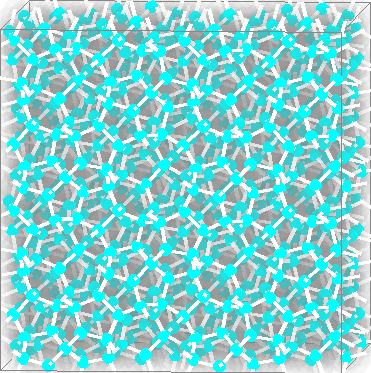

In [10]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice    = Lattice("CS2")
formatter  = Format("png", shadow="#8881",encode=False,bg="#fff",rotate="x5,y5")
img = GenIce(lattice, rep=[2,2,2]).generate_ice(formatter)

from IPython.display import display
display(img)

# Store the image in a file

Save it in a PNG file.

In [11]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice    = Lattice("ice3")
formatter  = Format("png", shadow="#8881",encode=True, bg="#fff",rotate="x5,y5")
img = GenIce(lattice, rep=[2,2,2]).generate_ice(formatter)

with open("ice3.png", "wb") as f:
    f.write(img)

## Analysis

Some statistical analyses are also available.

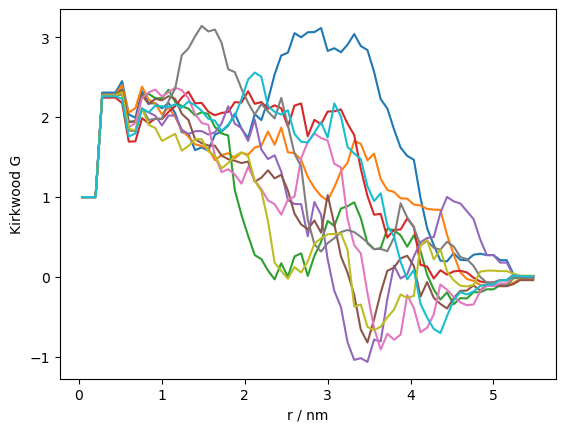

In [13]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule
import numpy as np
from matplotlib import pyplot as plt
import random

lattice    = Lattice("1c")
formatter  = Format("_KG")
water      = Molecule("spce")
for seed in range(1000,1010):
    random.seed(seed)
    np.random.seed(seed)
    result = GenIce(lattice, rep=(10,10,10)).generate_ice(formatter, water=water)

    kg = np.fromstring(result, dtype=float, sep=" ")
    N = kg.shape[0]
    kg = kg.reshape([N//2, 2])
    plt.plot(kg[:,0], kg[:,1])

plt.xlabel("r / nm")
plt.ylabel("Kirkwood G")
plt.show()

## Logging

You may want to see the process log.

In [14]:
from logging import getLogger, INFO, DEBUG, WARNING
logger = getLogger()
logger.setLevel(INFO)

from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice   = Lattice("1c")
formatter = Format("gromacs")
water     = Molecule("spce")
ice = GenIce(lattice, rep=(16,16,16), signature="Jupyter test").generate_ice(formatter, water=water)
with open("ice1c.gro", "w") as f:
    f.write(ice)

logger.setLevel(WARNING)

INFO:root:__init__: Constructor of GenIce.
INFO:root:  
INFO:root:  Jupyter test
INFO:root:No rotmatrices in lattice
INFO:root:Cell dimension:
INFO:root:  a = 4.0
INFO:root:  b = 4.0
INFO:root:  c = 4.0
INFO:root:  A = 90.0
INFO:root:  B = 90.0
INFO:root:  C = 90.0
INFO:root:Bond length (specified): 1.9
INFO:root:Target Density: 0.92
INFO:root:Original Density: 0.0037363002324809044
INFO:root:Bond length (scaled, nm): 0.3031365108343017
INFO:root:__init__: end.
INFO:root:__init__: 8 ms
INFO:root:Stage1: Replicate water molecules to make a repeated cell.
INFO:root:  Number of water molecules: 32768
INFO:root:  Number of water nodes: 8
INFO:root:Cell dimension:
INFO:root:  a = 0.6381821280722142
INFO:root:  b = 0.6381821280722142
INFO:root:  c = 0.6381821280722142
INFO:root:  A = 90.0
INFO:root:  B = 90.0
INFO:root:  C = 90.0
INFO:root:Stage1: end.
INFO:root:Stage1: 8 ms
INFO:root:Stage2: Make a random graph and replicate.
INFO:root:replicate_graph: 366 ms
INFO:root:Stage2: end.
INFO:roo

## Raw data

You can access the "raw" (internal) data.

In [5]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice    = Lattice("xFAU", rep=3)
formatter  = Format("raw", stage=(1,))
raw = GenIce(lattice, signature="Aeroice 3xFAU").generate_ice(formatter)

raw

{'reppositions': array([[1.38777878e-17, 1.12372436e-01, 5.61862178e-02],
        [1.38777878e-17, 5.61862178e-02, 1.12372436e-01],
        [5.61862178e-02, 1.38777878e-17, 1.12372436e-01],
        ...,
        [1.37627564e-01, 6.93813782e-01, 7.50000000e-01],
        [1.93813782e-01, 6.37627564e-01, 7.50000000e-01],
        [2.50000000e-01, 6.37627564e-01, 6.93813782e-01]]),
 'repcell': array([[3.47347586, 0.        , 0.        ],
        [0.        , 3.47347586, 0.        ],
        [0.        , 0.        , 3.47347586]]),
 'repcagetype': None,
 'repcagepos': None,
 'cagetypes': None}

### Visualization by Plotly

Use the raw data to plot by yourself.

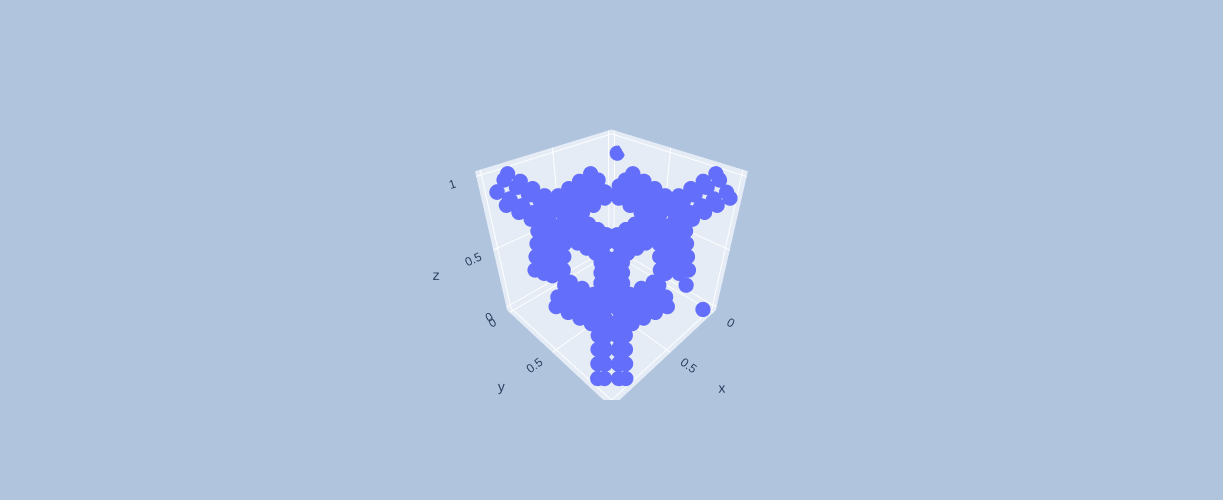

In [15]:
waters = raw["reppositions"]
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x = waters[:,0],
                                   y = waters[:,1],
                                   z = waters[:,2],
                                   marker=dict(size=5),
                                   mode = 'markers'
                                   )])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
            ),
    paper_bgcolor="LightSteelBlue",
    )

fig.show()

## Integration with py3Dmol.

Py3Dmol works on Google Colaboratory.

In [21]:
%pip install py3Dmol

  Using cached py3Dmol-2.0.3-py2.py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice    = Lattice("1h_unit")
formatter  = Format("gromacs")
water      = Molecule("spce")
ice = GenIce(lattice, rep=(4,4,4)).generate_ice(formatter, water=water)

In [23]:
import py3Dmol

view = py3Dmol.view()
view.addModel(ice, 'gro')
view.setStyle({'stick':{}})
view.addUnitCell()
view.zoomTo()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Various file formats using MDAnalysis

In [24]:
%pip install genice2-mdanalysis
exit(0)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 34.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from genice2.genice import GenIce
from genice2.plugin import Lattice, Format, Molecule

lattice    = Lattice("1h_unit")
formatter  = Format("mdanalysis")
water      = Molecule("spce")
# MDAnalysis universe
universe = GenIce(lattice, rep=(4,4,4)).generate_ice(formatter, water=water)


In [2]:
# MDAnalysis universe object

# Save as a .gro file.
allatoms = universe.select_atoms("all")
allatoms.write("1h_unit.pdb")

/opt/conda/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/opt/conda/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/opt/conda/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'segids' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/opt/conda/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/opt/conda/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'occupancies' Using default value of '

In [3]:
!rm -rf GenIceEnv/ GenIce #clean up

In [16]:
!rm ice1c.gro ice3.png 1h_unit.pdb